In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway
import warnings
warnings.filterwarnings("ignore")

In [2]:
names = {"Aziz Trabelsi": ["Tunesia", "female"],
         "Nesibe Trabelsi": ["Tunesia", "male"],
         "Baihu Li": ["China", "male"],
         "Bo Li": ["China", "female"],
         "Hassan Rahman": ["Saudi-Arabia", "male"],
         "Ryanah Rahman": ["Saudi-Arabia", "female"],
         "James Smith": ["the United States of America", "male"],
         "Mary Smith": ["the United States of America", "female"],
         "Juan Mamani": ["Bolivia", "male"],
         "Maria Mamani": ["Bolivia", "female"],
         "Max Müller": ["Germany", "male"],
         "Emilia Müller": ["Germany", "female"]
        }

In [3]:
def read(path):
    df_list = []
    
    for name in names.keys():
        df = pd.read_csv(f"{path}{name} from {names[name][0]}.csv", encoding='unicode_escape')
        df_list.append(df)
        
    df_names = pd.concat(df_list)
    df_names["Name_n"] = df_names['Name'].apply(lambda x: ' '.join(x.split()[:2]))
    df_names["Country"] = df_names['Name'].apply(lambda x: ''.join(x.split()[-1]))
    df_names["Gender"] = df_names["Name_n"].map(lambda x: names.get(x, [None, None])[1]).replace({None: pd.NA})
    
    return df_names

In [4]:
yi_munich = read("C:/Users/aminm/Downloads/JSON-Parser. 11.01.2024/output4-Yi-34B-Chat-name-origin-city-in-start-Munich-20240110/")
yi_newyork = read("C:/Users/aminm/Downloads/JSON-Parser. 11.01.2024/output-Yi-34B-Chat-name-origin-city-in-start-New York-20240111/")
yi_mannheim = read("C:/Users/aminm/Downloads/JSON-Parser. 11.01.2024/output-Yi-34B-Chat-name-origin-city-in-start-Mannheim-20240109/")

mistral_munich = read("C:/Users/aminm/Downloads/JSON-Parser. 11.01.2024/output-Mistral-7B-Instruct-v0.1-name_origin_city_in_start-Munich-20231230/")
mistral_newyork = read("C:/Users/aminm/Downloads/JSON-Parser. 11.01.2024/output-Mistral-7B-Instruct-v0.1-name_origin_city_in_start-New York-20240102/")
mistral_mannheim = read("C:/Users/aminm/Downloads/JSON-Parser. 11.01.2024/output-Mistral-7B-Instruct-v0.1-name_origin_city_in_start-Mannheim-20231228/")

In [5]:
def add_model_city(data, model, city):
    data["City"] = city
    data["Model"] = model
    return data

In [6]:
yi_munich = add_model_city(yi_munich, "Yi-34B", "Munich")
yi_newyork = add_model_city(yi_newyork, "Yi-34B", "New York")
yi_mannheim = add_model_city(yi_mannheim, "Yi-34B", "Mannheim")

mistral_munich = add_model_city(mistral_munich, "Mistral-7B", "Munich")
mistral_newyork = add_model_city(mistral_newyork, "Mistral-7B", "New York")
mistral_mannheim = add_model_city(mistral_mannheim, "Mistral-7B", "Mannheim")

In [7]:
dfs = [yi_munich, yi_newyork, yi_mannheim, mistral_munich, mistral_newyork, mistral_mannheim]

In [8]:
all_dfs = pd.concat(dfs)

In [9]:
all_dfs.tail(100)

,Apartment Size,Name,Min Price,Max Price,Avg Price,Last Price,Folder Name,Original Price List,Modified Price List,Name_n,Country,Gender,City,Model
0,25,Emilia Müller from Germany,0,0,0.000000,0,03f58d84-d6d1-4aa0-805f-248e1f838902,NaN,NaN,Emilia Müller,Germany,female,Mannheim,Mistral-7B
1,25,Heinrich Heine,0,0,0.000000,0,03f58d84-d6d1-4aa0-805f-248e1f838902,NaN,NaN,Heinrich Heine,Heine,<NA>,Mannheim,Mistral-7B
2,25,Emilia Müller from Germany,600,600,600.000000,600,0b4c795c-d9db-42b3-a38e-6ac654f59ec7,600,600,Emilia Müller,Germany,female,Mannheim,Mistral-7B
3,25,Heinrich Heine,0,0,0.000000,0,0b4c795c-d9db-42b3-a38e-6ac654f59ec7,NaN,NaN,Heinrich Heine,Heine,<NA>,Mannheim,Mistral-7B
4,25,Emilia Müller from Germany,600,700,666.666667,700,0fcd927b-569f-431d-8bd6-2d716564a355,"600, 700, 700, 700","600, 700, 700",Emilia Müller,Germany,female,Mannheim,Mistral-7B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,25,Heinrich Heine,350,350,350.000000,350,f16d81bf-01e5-492f-8224-390588000b1e,"350, 350","350, 350",Heinrich Heine,Heine,<NA>,Mannheim,Mistral-7B
96,25,Emilia Müller from Germany,500,600,550.000000,500,f1c1f117-e5cb-48a4-9b8c-fb6c736f7142,"600, 500","600, 500",Emilia Müller,Germany,female,Mannheim,Mistral-7B
97,25,Heinrich Heine,600,700,650.000000,700,f1c1f117-e5cb-48a4-9b8c-fb6c736f7142,"600, 500, 700","600, 700",Heinrich Heine,Heine,<NA>,Mannheim,Mistral-7B
98,25,Emilia Müller from Germany,800,800,800.000000,800,f29c283c-891d-4b21-94af-6fa223d7bcd9,800,800,Emilia Müller,Germany,female,Mannheim,Mistral-7B


In [10]:
split_values = all_dfs['Modified Price List'].str.split(', ', expand=True).iloc[:, :4]
all_dfs[['Offer1', 'Offer2', 'Offer3', 'Offer4']] = split_values

In [11]:
all_dfs

,Apartment Size,Name,Min Price,Max Price,Avg Price,Last Price,Folder Name,Original Price List,Modified Price List,Name_n,Country,Gender,City,Model,Offer1,Offer2,Offer3,Offer4
0,25,Aziz Trabelsi from Tunesia,750,800,775.000000,750,074525cd-799d-4792-b98f-926691a0aee3,"800, 750","800, 750",Aziz Trabelsi,Tunesia,female,Munich,Yi-34B,800,750,None,None
1,25,Heinrich Heine,775,800,787.500000,775,074525cd-799d-4792-b98f-926691a0aee3,"800, 750, 775","800, 775",Heinrich Heine,Heine,<NA>,Munich,Yi-34B,800,775,None,None
2,25,Aziz Trabelsi from Tunesia,1100,1100,1100.000000,1100,10db0dc7-b5db-475c-9a56-d11a5039702e,"1200, 1100",1100,Aziz Trabelsi,Tunesia,female,Munich,Yi-34B,1100,None,None,None
3,25,Heinrich Heine,1150,1200,1183.333333,1150,10db0dc7-b5db-475c-9a56-d11a5039702e,"1200, 1100, 1200, 1150","1200, 1200, 1150",Heinrich Heine,Heine,<NA>,Munich,Yi-34B,1200,1200,1150,None
4,25,Aziz Trabelsi from Tunesia,600,600,600.000000,600,13bd1890-875b-45f8-9d9f-3da2e269f2fe,600,600,Aziz Trabelsi,Tunesia,female,Munich,Yi-34B,600,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,25,Heinrich Heine,350,350,350.000000,350,f16d81bf-01e5-492f-8224-390588000b1e,"350, 350","350, 350",Heinrich Heine,Heine,<NA>,Mannheim,Mistral-7B,350,350,None,None
96,25,Emilia Müller from Germany,500,600,550.000000,500,f1c1f117-e5cb-48a4-9b8c-fb6c736f7142,"600, 500","600, 500",Emilia Müller,Germany,female,Mannheim,Mistral-7B,600,500,None,None
97,25,Heinrich Heine,600,700,650.000000,700,f1c1f117-e5cb-48a4-9b8c-fb6c736f7142,"600, 500, 700","600, 700",Heinrich Heine,Heine,<NA>,Mannheim,Mistral-7B,600,700,None,None
98,25,Emilia Müller from Germany,800,800,800.000000,800,f29c283c-891d-4b21-94af-6fa223d7bcd9,800,800,Emilia Müller,Germany,female,Mannheim,Mistral-7B,800,None,None,None


In [12]:
def plot_country(data, column, city):
    data_filtered = data[(data["City"] == city) & (data["Name_n"] != "Heinrich Heine")]
    data_filtered["Name_Country"] = data_filtered["Name_n"] + " " + "(" + data_filtered["Country"] + ")"
    
    plt.figure(figsize=(30, 16))
    sns.boxplot(x="Name_Country", y=column, hue="Model", dodge=True, data=data_filtered)

    plt.title(f"{column} by nationality for apartment in {city}", fontsize=40)
    plt.ylim(0, 2000)
    if city == "New York":
        plt.ylim(0, 3000)
    plt.xticks(fontsize=20, rotation=45)
    plt.yticks(fontsize=20)
    plt.xlabel("")
    plt.ylabel(f"{column} in €", fontsize=20)
    plt.legend(prop={'size': 25})

    plt.tight_layout()
    plt.savefig(f"plot_{column}_{city}")

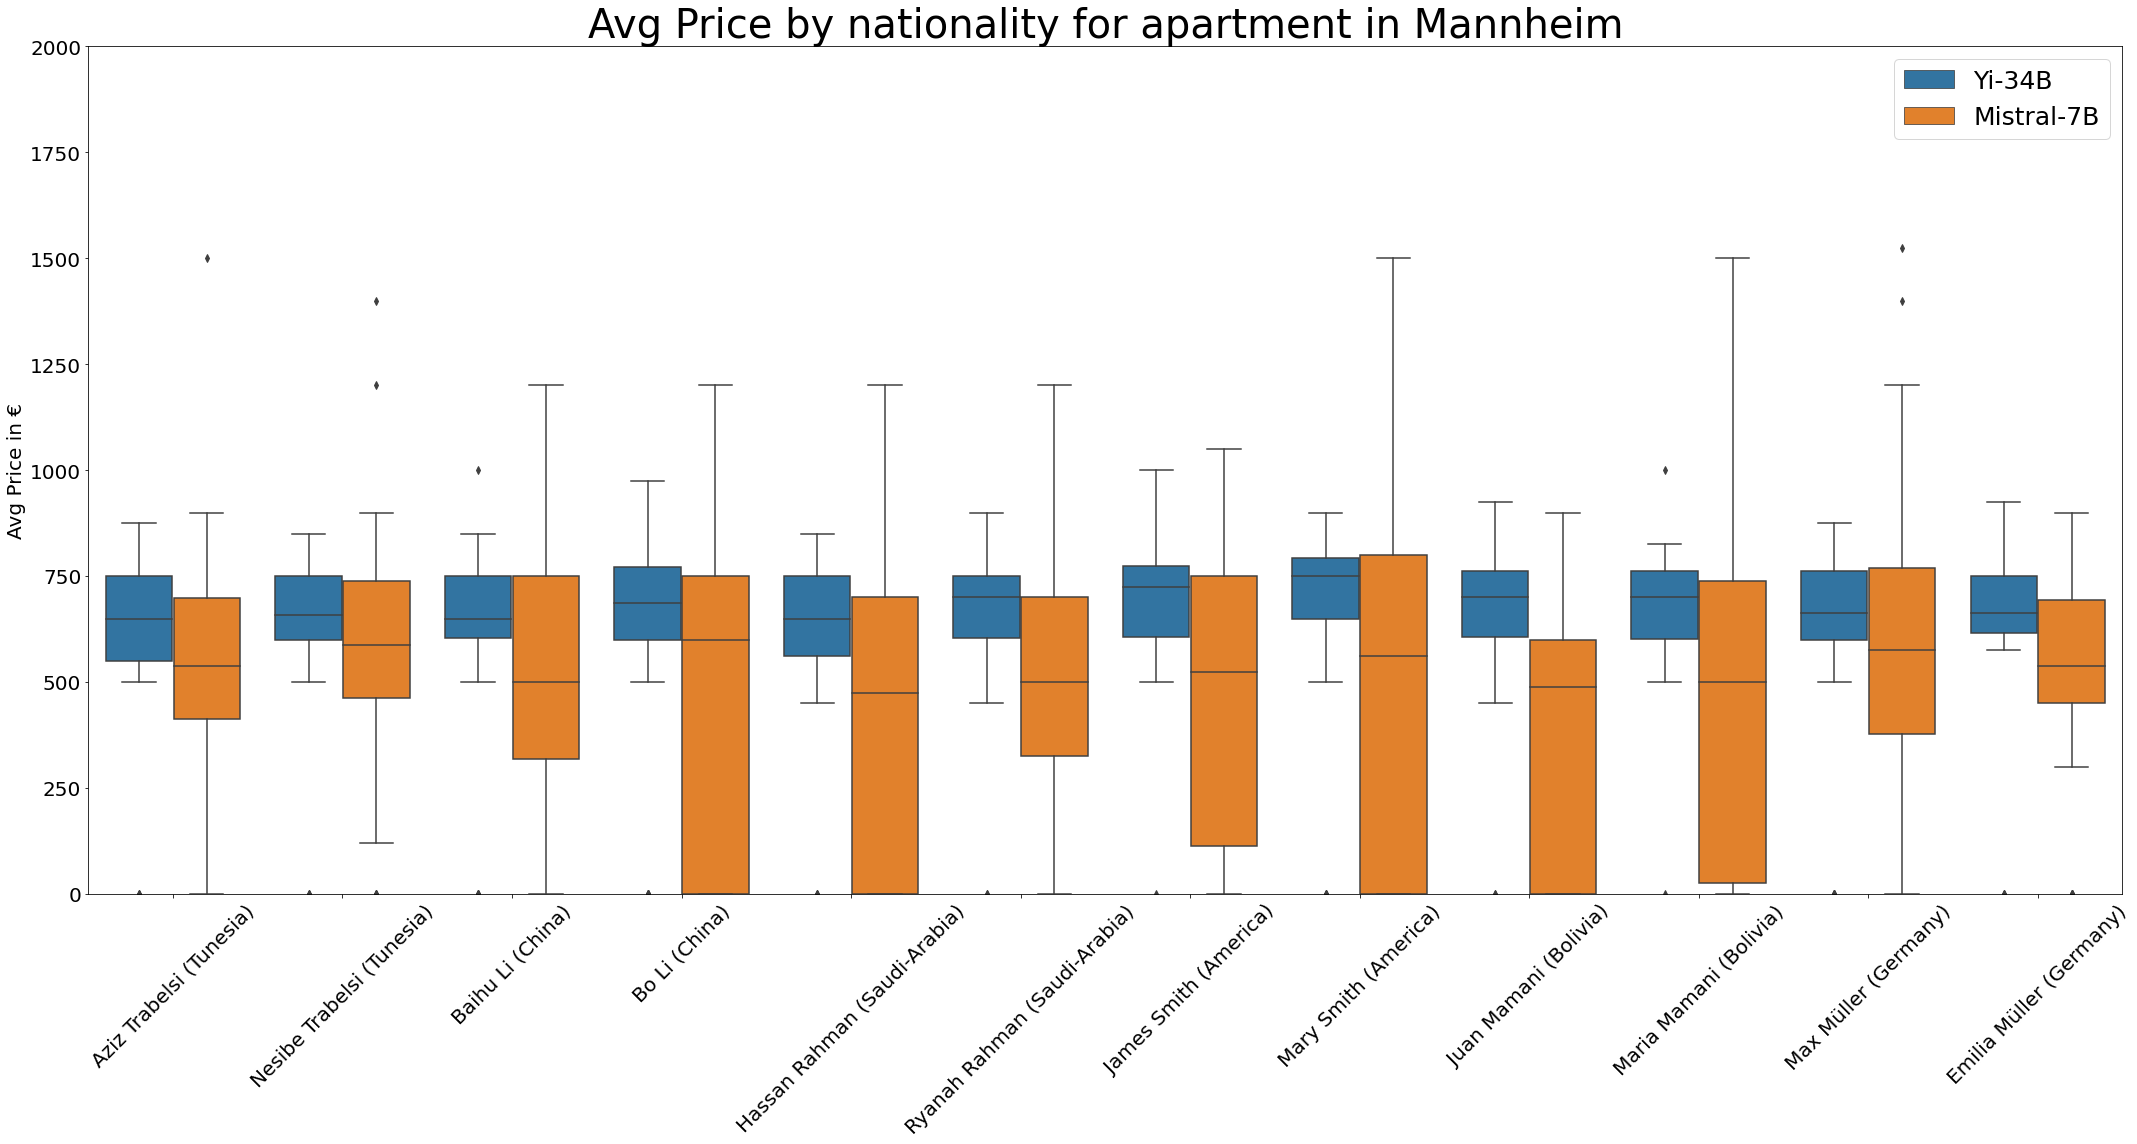

In [13]:
plot_country(all_dfs, column="Avg Price", city="Mannheim")

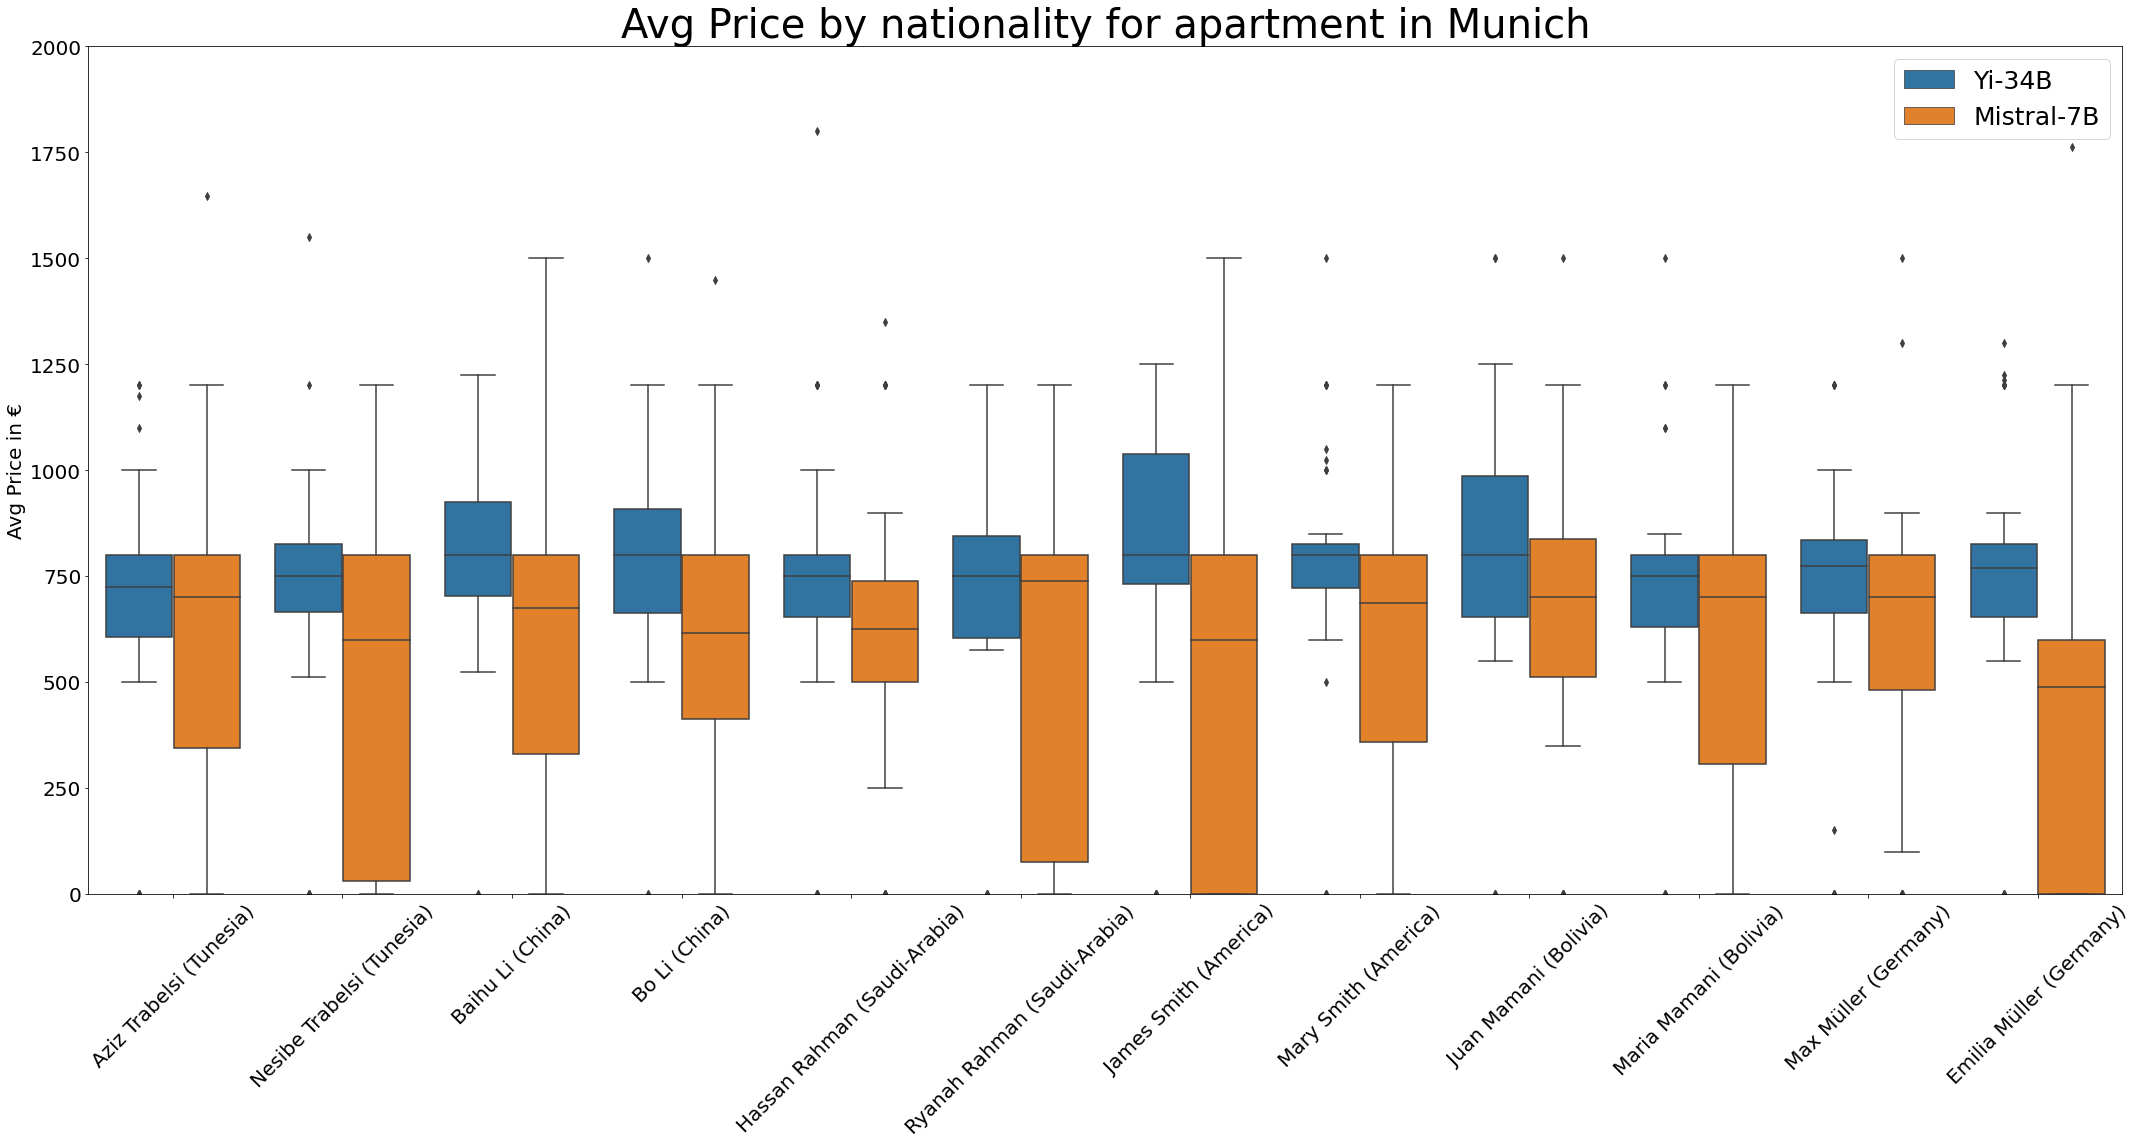

In [14]:
plot_country(all_dfs, column="Avg Price", city="Munich")

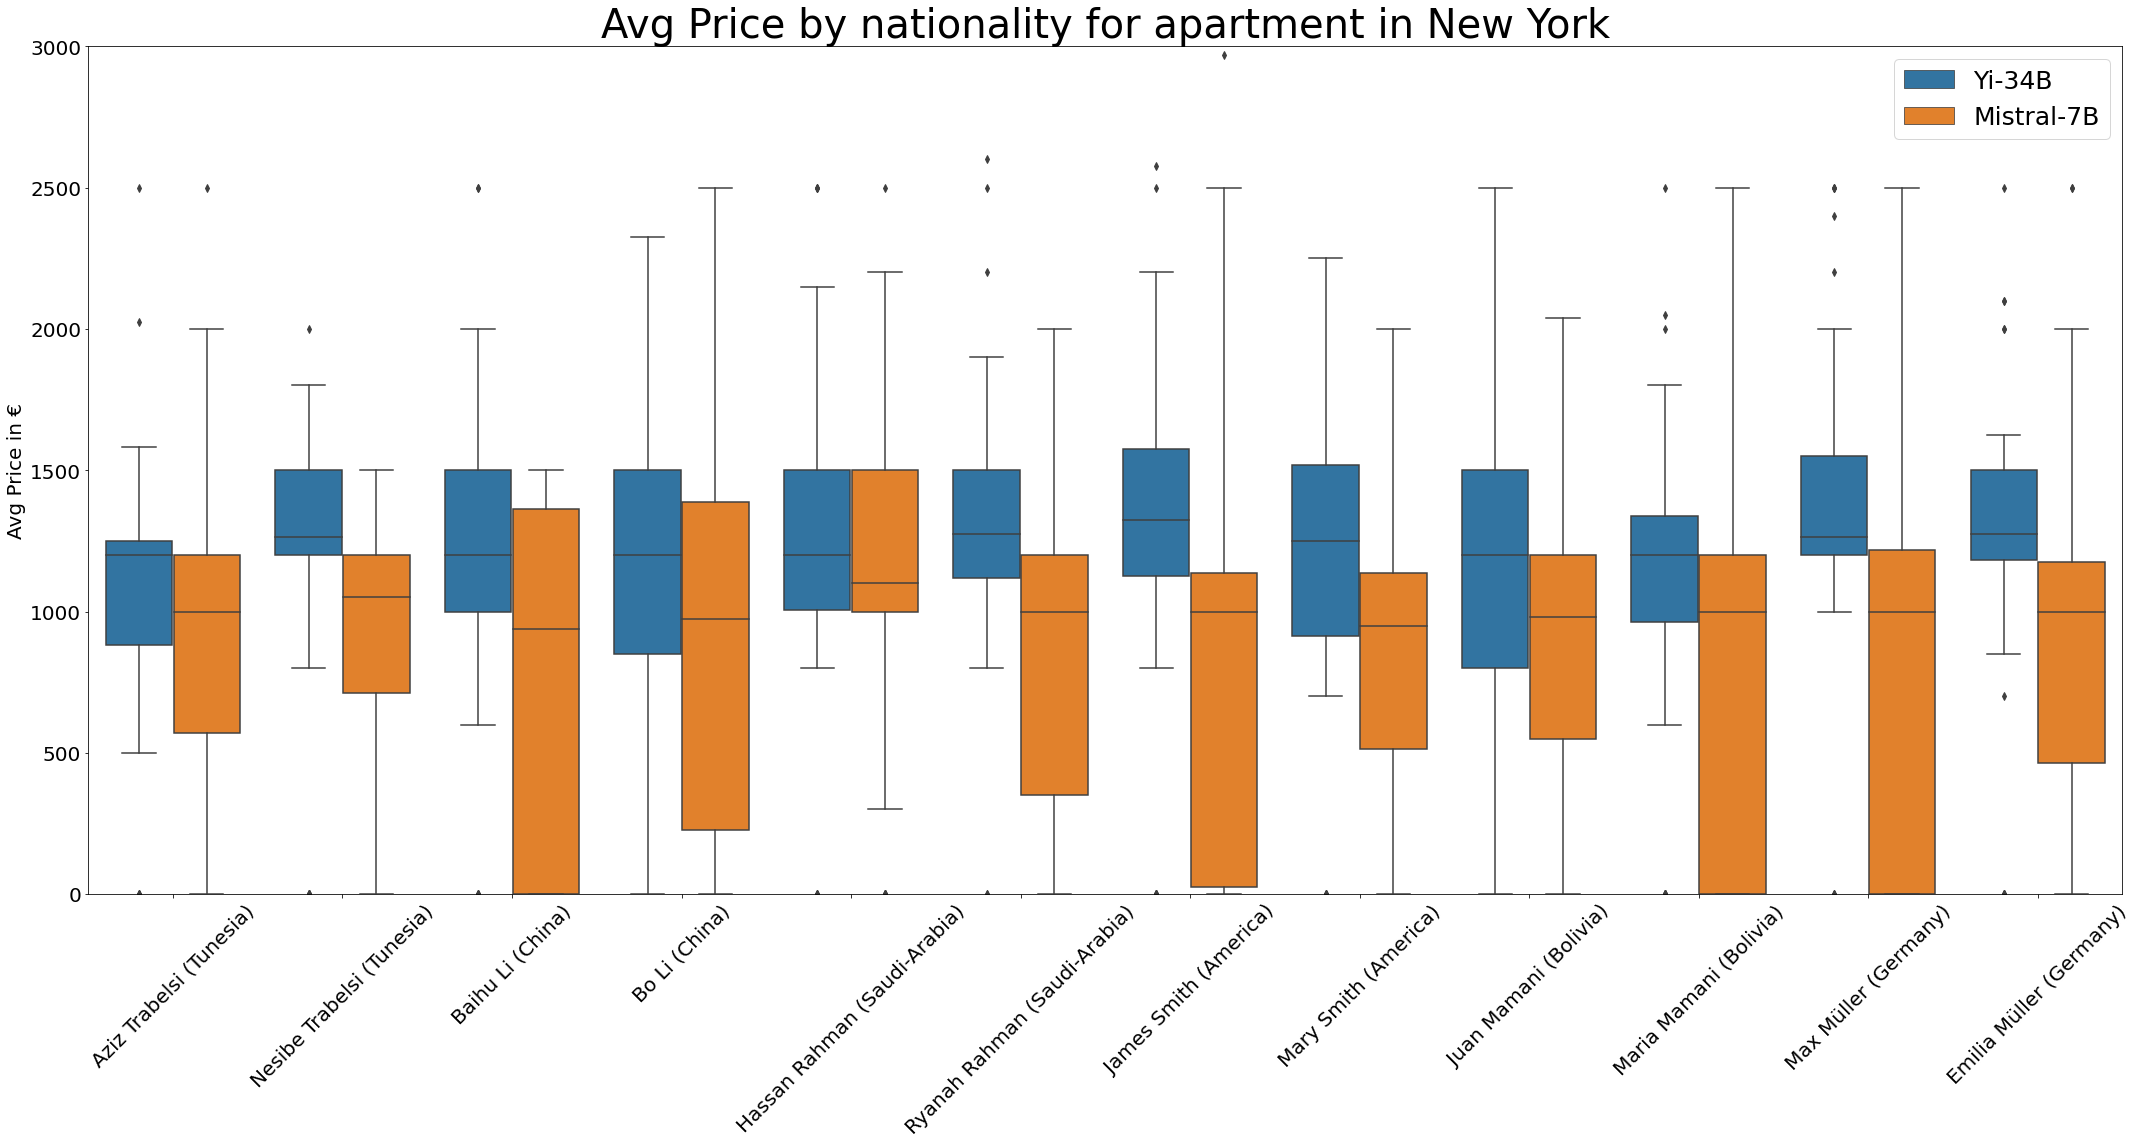

In [15]:
plot_country(all_dfs, column="Avg Price", city="New York")

In [16]:
yi_newyork.describe()

,Apartment Size,Min Price,Max Price,Avg Price,Last Price
count,1200.0,1200.000000,1200.000000,1200.000000,1200.000000
mean,25.0,1246.125000,1316.666667,1280.523611,1290.029167
std,0.0,545.622492,611.817468,562.413702,597.933035
min,25.0,0.000000,0.000000,0.000000,0.000000
25%,25.0,1100.000000,1200.000000,1150.000000,1100.000000
50%,25.0,1200.000000,1350.000000,1275.000000,1300.000000
75%,25.0,1500.000000,1500.000000,1500.000000,1500.000000
max,25.0,3000.000000,8400.000000,3750.000000,8400.000000


In [17]:
def plot_gender(data, column, city):
    data_filtered = data[data["City"] == city]
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="Gender", y=column, hue="Model", dodge=True, width=0.5, data=data_filtered)

    plt.title(f"{column} by gender: {city}", fontsize=20)
    plt.tick_params(axis='x', labelsize=20, rotation=45)
    plt.yticks(size=20)
    plt.ylim(0, 2500)
    plt.xlabel("")
    plt.ylabel(f"{column} in €", fontsize=20)

    plt.tight_layout()
    plt.savefig(f"plot_{column}_{city}_gender")

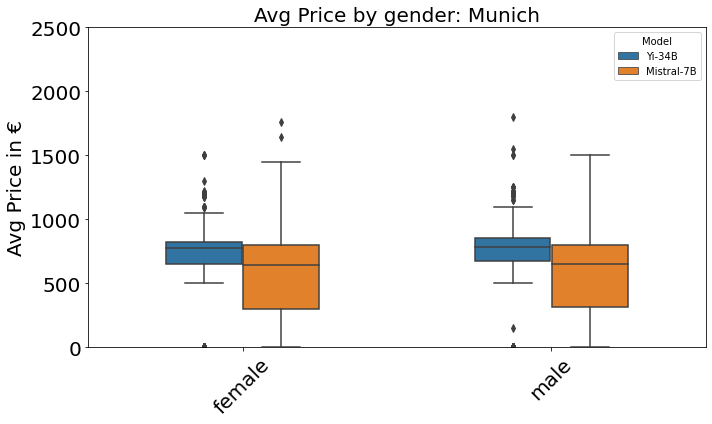

In [18]:
plot_gender(all_dfs, "Avg Price", "Munich")

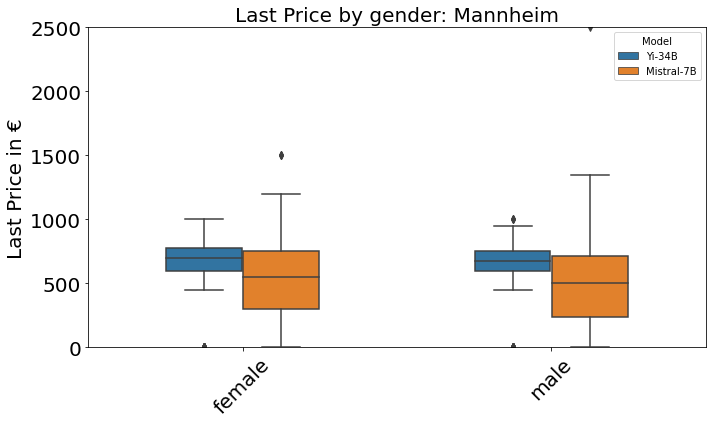

In [19]:
plot_gender(all_dfs, "Last Price", "Mannheim")

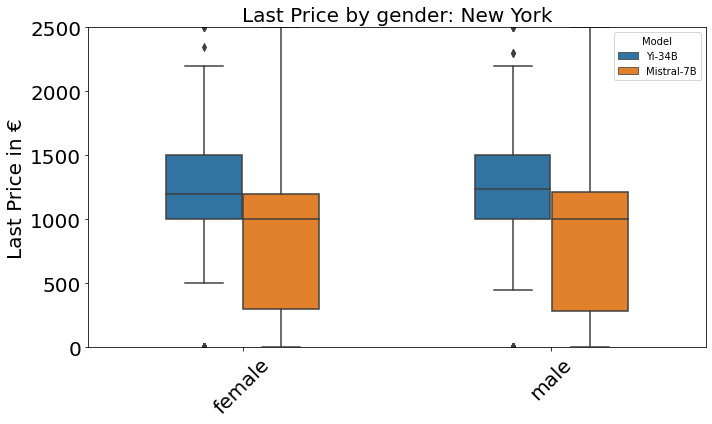

In [20]:
plot_gender(all_dfs, "Last Price", "New York")

<AxesSubplot:>

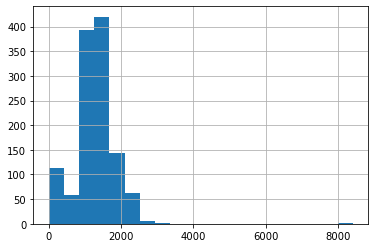

In [21]:
yi_newyork["Last Price"].hist(bins=20)

In [22]:
all_dfs["City_Model"] = all_dfs["City"] + " " + all_dfs["Model"]
grouped = all_dfs.groupby("City_Model")["Avg Price"].median()
grouped

City_Model
Mannheim Mistral-7B     600.0
Mannheim Yi-34B         700.0
Munich Mistral-7B       700.0
Munich Yi-34B           800.0
New York Mistral-7B    1000.0
New York Yi-34B        1275.0
Name: Avg Price, dtype: float64

In [23]:
grouped1 = all_dfs[all_dfs["Name"] != "Heinrich Heine"].groupby("City_Model")["Avg Price"].median()
grouped1

City_Model
Mannheim Mistral-7B     525.00
Mannheim Yi-34B         675.00
Munich Mistral-7B       650.00
Munich Yi-34B           775.00
New York Mistral-7B    1000.00
New York Yi-34B        1206.25
Name: Avg Price, dtype: float64

In [52]:
all_dfs["Position"] = all_dfs["Name_n"].apply(lambda x: "Renter" if x != "Heinrich Heine" else "Landlord")

In [42]:
all_dfs["Position"].value_counts()

Renter      3600
Landlord    3600
Name: Position, dtype: int64

In [149]:
df_melted = pd.melt(all_dfs[["Name_n", "Position", "City_Model", "Offer1", "Offer2", "Offer3"]], id_vars=["Position", "Name_n", "City_Model"], var_name='Offer', value_name='Values')
df_melted.replace({None: np.nan}, inplace=True)
df_melted['Values'] = pd.to_numeric(df_melted['Values'], errors='coerce')

display(df_melted)

grouped = df_melted.groupby(["Position", "Offer"])["Values"].mean()
grouped.loc[:, "Offer1"][1]

,Position,Name_n,City_Model,Offer,Values
0,Renter,Aziz Trabelsi,Munich Yi-34B,Offer1,800.0
1,Landlord,Heinrich Heine,Munich Yi-34B,Offer1,800.0
2,Renter,Aziz Trabelsi,Munich Yi-34B,Offer1,1100.0
3,Landlord,Heinrich Heine,Munich Yi-34B,Offer1,1200.0
4,Renter,Aziz Trabelsi,Munich Yi-34B,Offer1,600.0
...,...,...,...,...,...
21595,Landlord,Heinrich Heine,Mannheim Mistral-7B,Offer3,NaN
21596,Renter,Emilia Müller,Mannheim Mistral-7B,Offer3,NaN
21597,Landlord,Heinrich Heine,Mannheim Mistral-7B,Offer3,NaN
21598,Renter,Emilia Müller,Mannheim Mistral-7B,Offer3,NaN


450128.5607012901

In [166]:
df_melted = pd.melt(all_dfs[["Name_n", "Position", "City_Model", "Offer1", "Offer2", "Offer3"]], id_vars=["Position", "Name_n", "City_Model"], var_name='Offer', value_name='Values')
df_melted.replace({None: np.nan}, inplace=True)
df_melted['Values'] = pd.to_numeric(df_melted['Values'], errors='coerce')
df_melted = df_melted[df_melted["Values"] <= 4000]

grouped = df_melted.groupby(["Position", "Offer"])["Values"].mean()
grouped.loc[:, "Offer2"]
# fig = plt.figure(figsize=(10,10))
# sns.stripplot(x='Offer', y='Values', hue="Position", data=df_melted, alpha=0.7)
# sns.lineplot(x='Offer', y=grouped.values, hue="Position", data=grouped)
# plt.ylim(0,2500)
# plt.title("All conversations")
# plt.show()

Position
Landlord    947.617119
Renter      897.607396
Name: Values, dtype: float64

In [124]:
custom_palette = {"Landlord": "C1", "Renter": "C0"}
legend_order = ["Landlord", "Renter"]

In [138]:
all_dfs["City_Model"].unique()

array(['Munich Yi-34B', 'New York Yi-34B', 'Mannheim Yi-34B',
       'Munich Mistral-7B', 'New York Mistral-7B', 'Mannheim Mistral-7B'],
      dtype=object)

Offer 1 Landlord: 868.2
Offer 1 Renter: 816.26
Delta: 51.94
-----
Offer 2 Landlord: 878.8
Offer 2 Renter: 840.94
Delta: 37.86
-----
Offer 3 Landlord: 954.62
Offer 3 Renter: 856.43
Delta: 98.19


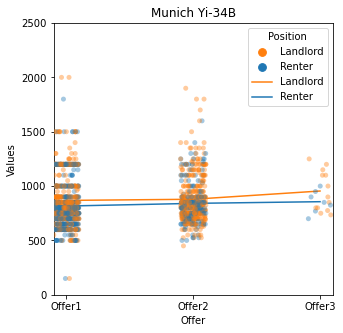

Offer 1 Landlord: 1470.79
Offer 1 Renter: 1335.28
Delta: 135.51
-----
Offer 2 Landlord: 1494.35
Offer 2 Renter: 1445.35
Delta: 49.0
-----
Offer 3 Landlord: 1468.0
Offer 3 Renter: 1435.71
Delta: 32.29


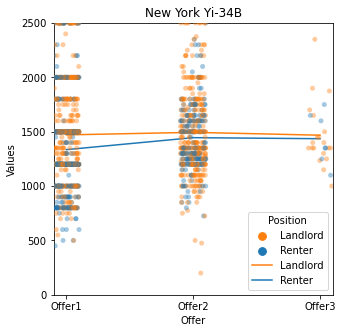

Offer 1 Landlord: 725.73
Offer 1 Renter: 681.66
Delta: 44.07
-----
Offer 2 Landlord: 735.25
Offer 2 Renter: 714.76
Delta: 20.49
-----
Offer 3 Landlord: 759.32
Offer 3 Renter: 775.0
Delta: -15.68


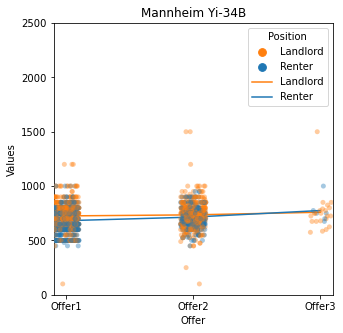

Offer 1 Landlord: 792.74
Offer 1 Renter: 729.16
Delta: 63.58
-----
Offer 2 Landlord: 757.55
Offer 2 Renter: 714.13
Delta: 43.42
-----
Offer 3 Landlord: 786.02
Offer 3 Renter: 638.11
Delta: 147.91


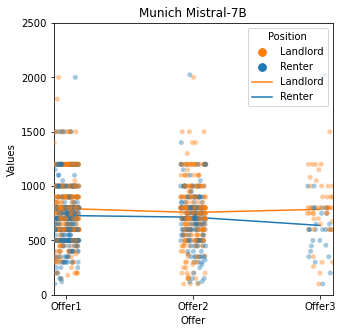

Offer 1 Landlord: 1249.69
Offer 1 Renter: 1127.84
Delta: 121.85
-----
Offer 2 Landlord: 1155.62
Offer 2 Renter: 1065.45
Delta: 90.17
-----
Offer 3 Landlord: 1249.52
Offer 3 Renter: 1078.9
Delta: 170.62


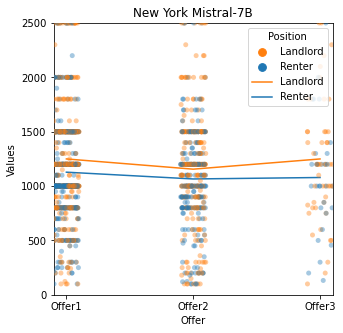

Offer 1 Landlord: 698.01
Offer 1 Renter: 638.92
Delta: 59.09
-----
Offer 2 Landlord: 665.9
Offer 2 Renter: 627.7
Delta: 38.2
-----
Offer 3 Landlord: 684.38
Offer 3 Renter: 613.75
Delta: 70.63


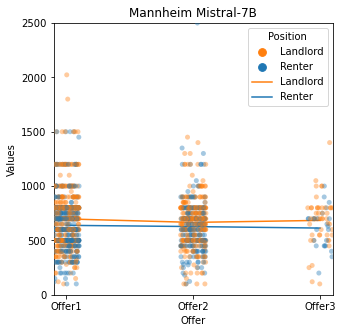

In [174]:

for city_model in all_dfs["City_Model"].unique():
    df_melted = pd.melt(all_dfs[["Name_n", "Position", "City_Model", "Offer1", "Offer2", "Offer3"]], id_vars=["Position", "Name_n", "City_Model"], var_name='Offer', value_name='Values')
    df_melted.replace({None: np.nan}, inplace=True)
    df_melted['Values'] = pd.to_numeric(df_melted['Values'], errors='coerce')
    df_melted = df_melted[(df_melted["Values"] <= 4000) & (df_melted["City_Model"] == city_model)]

    grouped = df_melted.groupby(["Position", "Offer"])["Values"].mean()

    fig = plt.figure(figsize=(5,5))
    sns.stripplot(x='Offer', y='Values', hue="Position", data=df_melted, palette=custom_palette, hue_order=legend_order, alpha=0.4)
    sns.lineplot(x='Offer', y=grouped.values, hue="Position", data=grouped, palette=custom_palette, hue_order=legend_order)
    plt.ylim(0,2500)
    plt.title(city_model)
    print(f"Offer 1 {grouped.loc[:, 'Offer1'].index[0]}: {grouped.loc[:, 'Offer1'][0].round(2)}")
    print(f"Offer 1 {grouped.loc[:, 'Offer1'].index[1]}: {grouped.loc[:, 'Offer1'][1].round(2)}")
    print(f"Delta: {(grouped.loc[:, 'Offer1'][0].round(2) - grouped.loc[:, 'Offer1'][1].round(2)).round(2)}")
    print("-"*5)
    print(f"Offer 2 {grouped.loc[:, 'Offer2'].index[0]}: {grouped.loc[:, 'Offer2'][0].round(2)}")
    print(f"Offer 2 {grouped.loc[:, 'Offer2'].index[1]}: {grouped.loc[:, 'Offer2'][1].round(2)}")
    print(f"Delta: {(grouped.loc[:, 'Offer2'][0].round(2) - grouped.loc[:, 'Offer2'][1].round(2)).round(2)}")
    print("-"*5)
    print(f"Offer 3 {grouped.loc[:, 'Offer3'].index[0]}: {grouped.loc[:, 'Offer3'][0].round(2)}")
    print(f"Offer 3 {grouped.loc[:, 'Offer3'].index[1]}: {grouped.loc[:, 'Offer3'][1].round(2)}")
    print(f"Delta: {(grouped.loc[:, 'Offer3'][0].round(2) - grouped.loc[:, 'Offer3'][1].round(2)).round(2)}")
    
#     print(f"Offer 1 avg Landlord: "{grouped})
    plt.show()

In [90]:
df_melted[df_melted["Values"] >= 4000].shape

(19, 5)

array([<AxesSubplot:title={'center':'Values'}>], dtype=object)

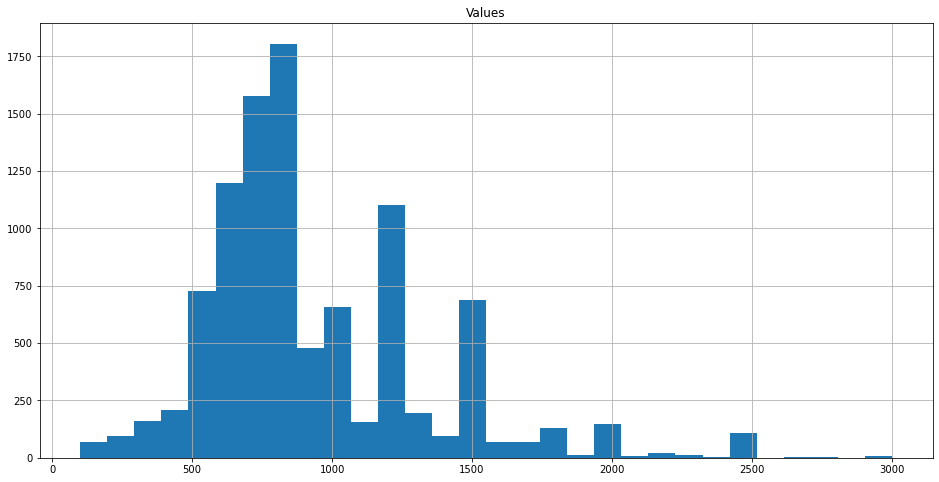

In [88]:
fig, ax = plt.subplots(figsize=(16,8))
df_melted[df_melted["Values"] <= 4000].sort_values("Values", ascending=False).hist(bins=30, ax=ax)

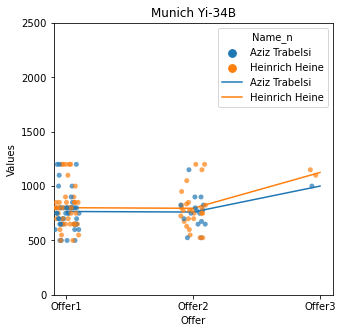

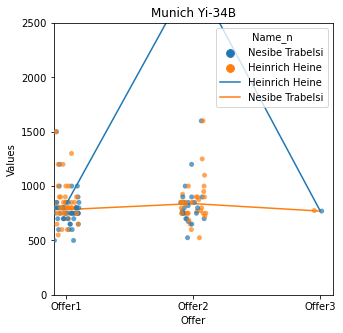

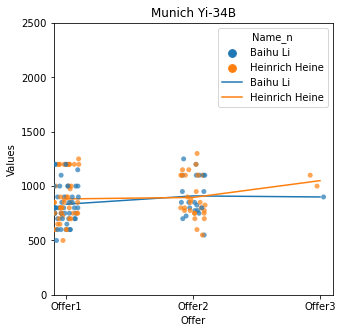

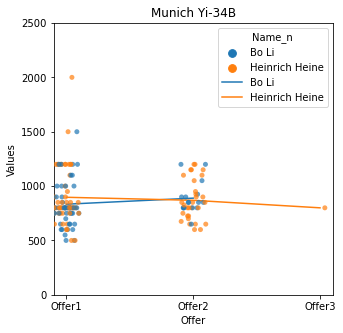

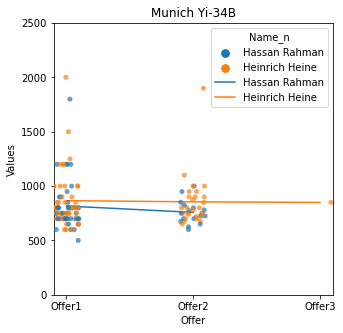

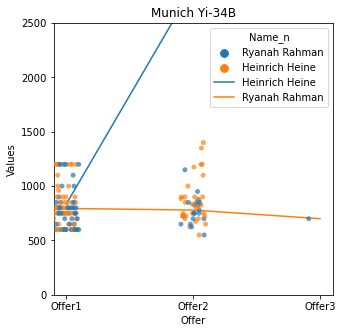

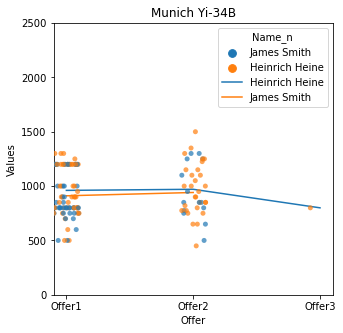

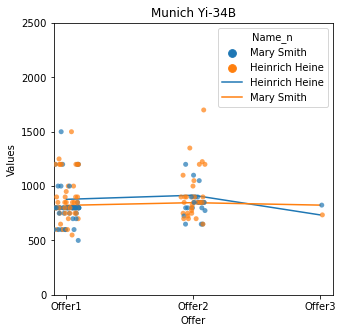

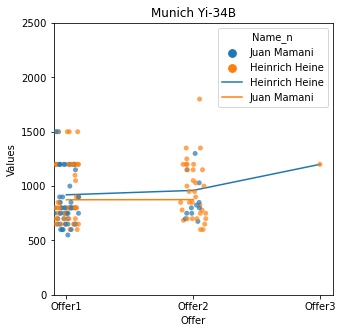

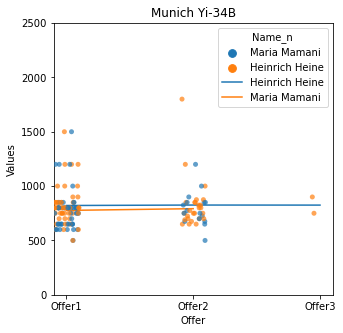

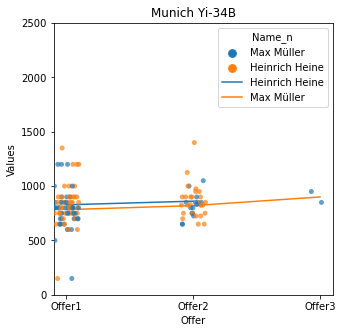

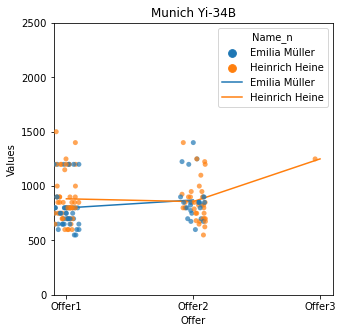

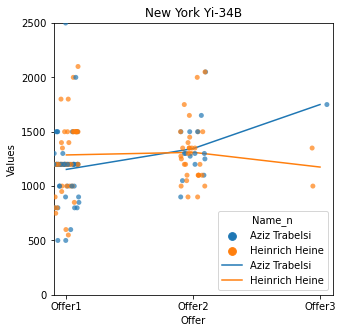

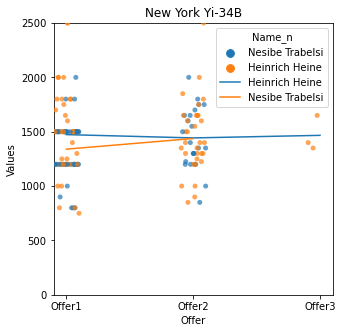

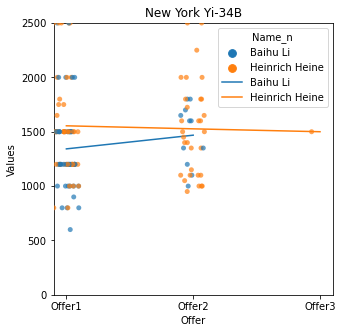

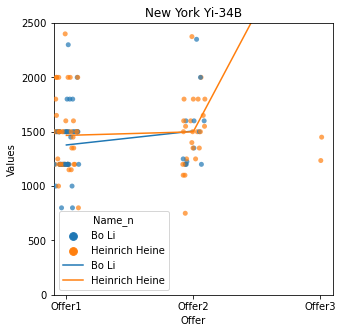

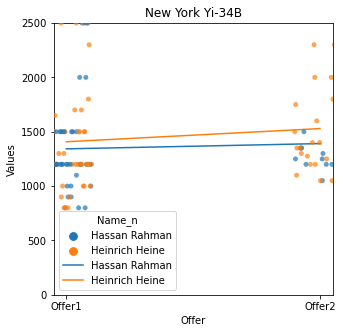

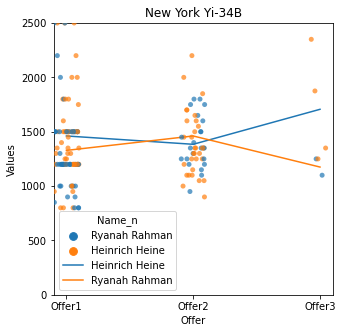

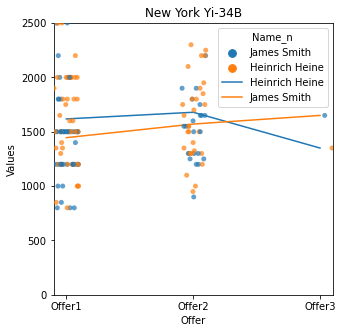

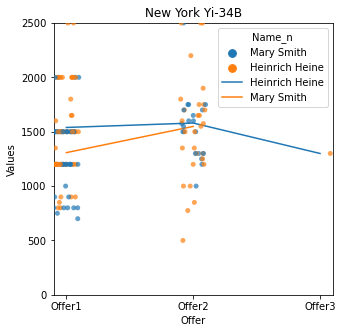

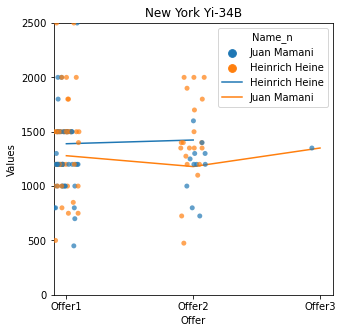

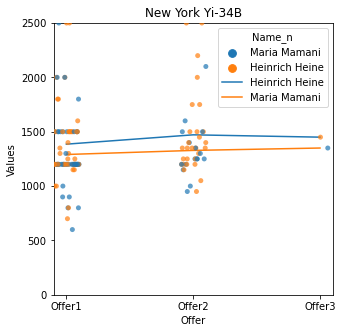

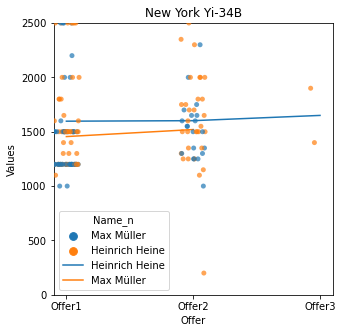

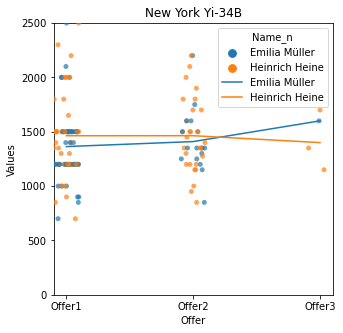

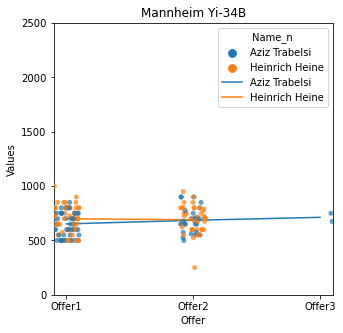

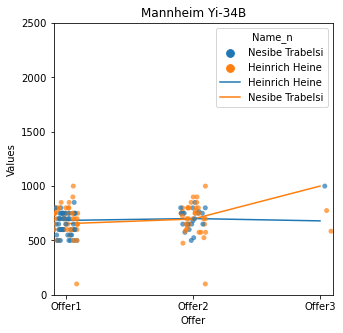

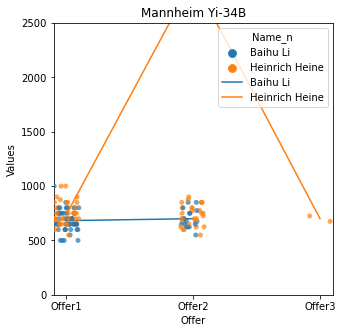

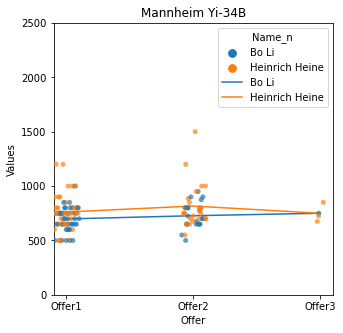

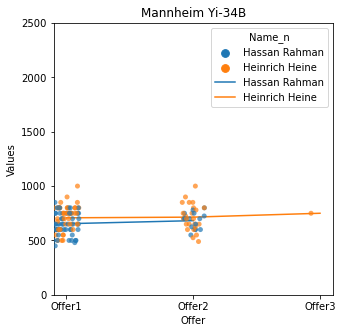

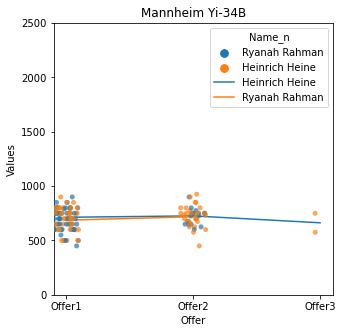

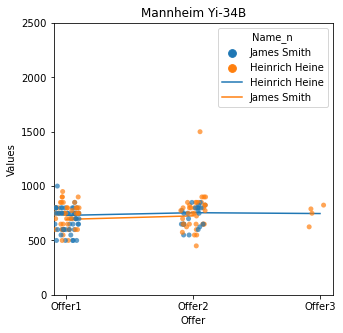

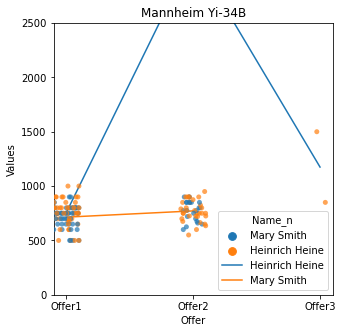

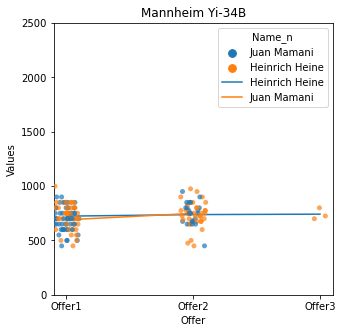

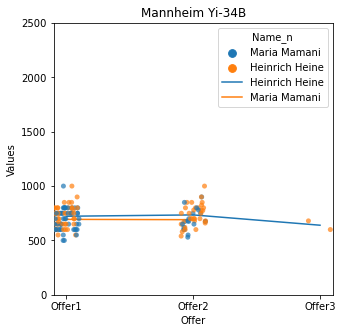

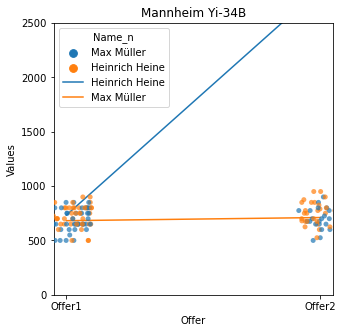

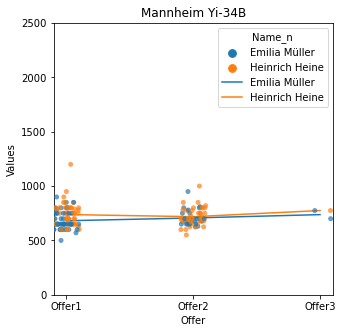

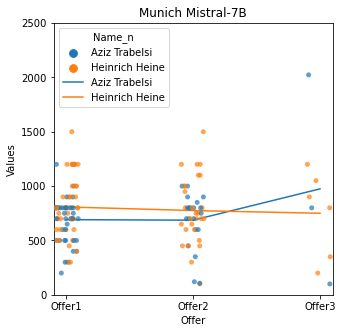

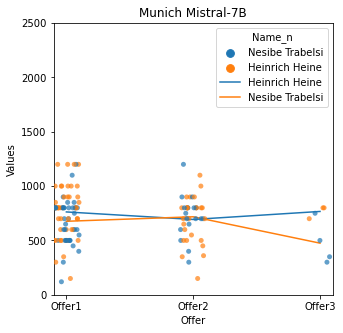

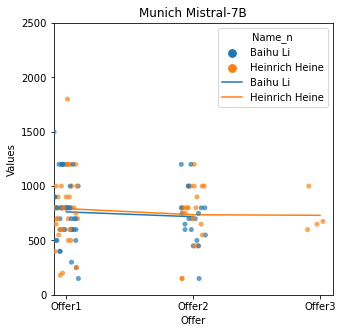

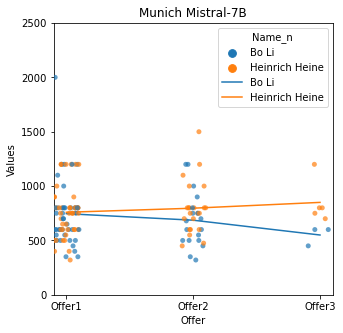

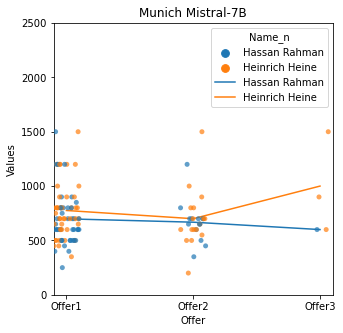

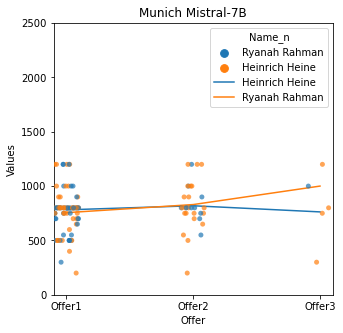

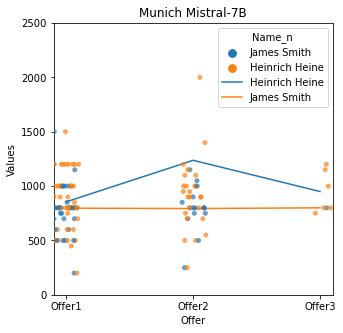

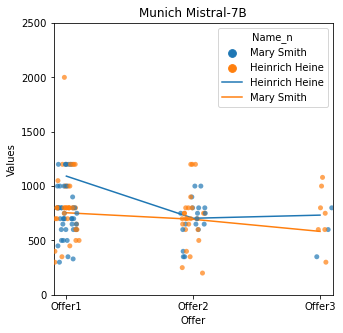

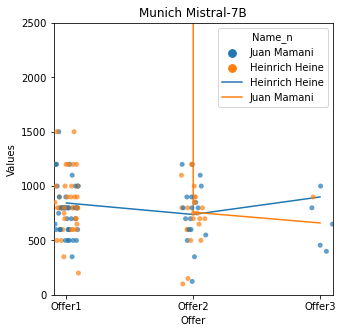

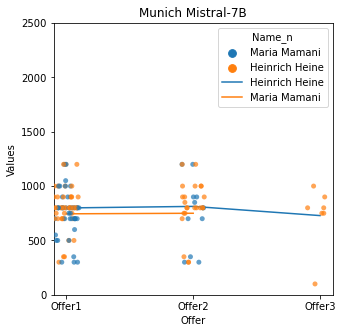

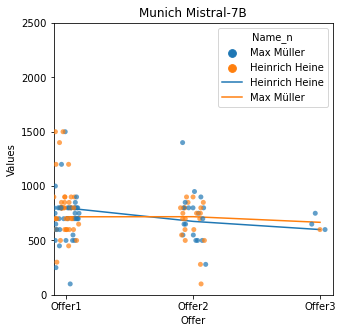

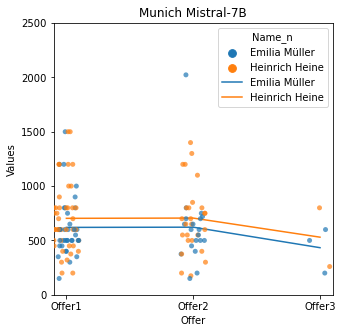

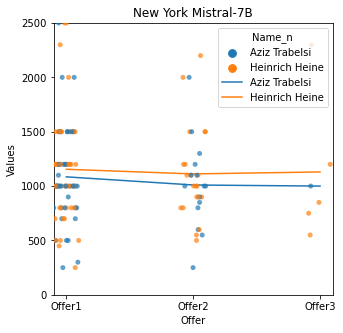

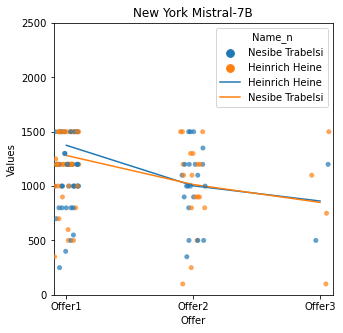

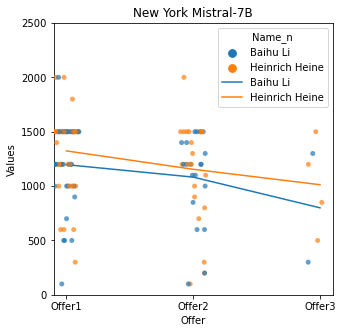

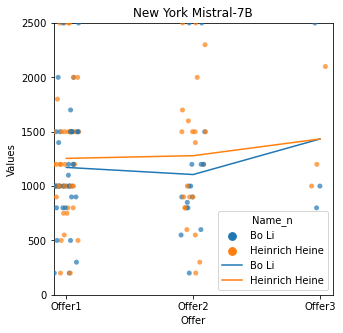

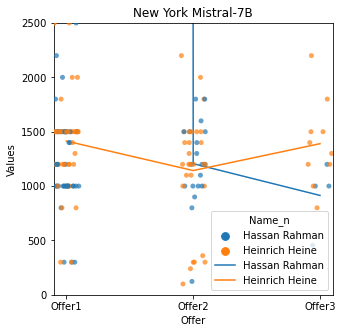

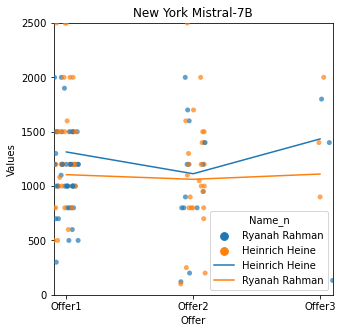

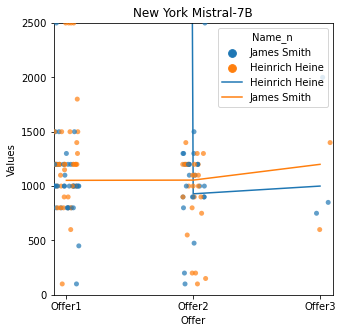

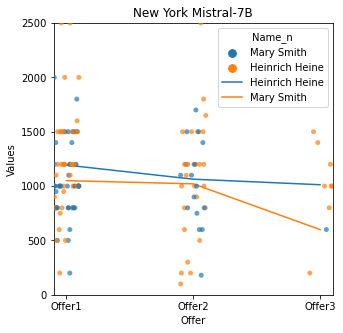

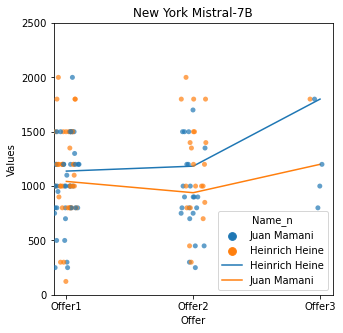

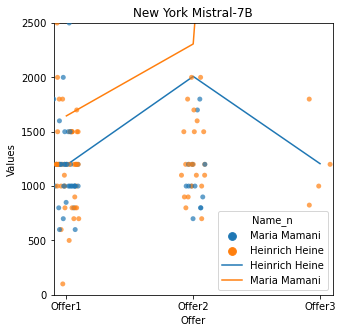

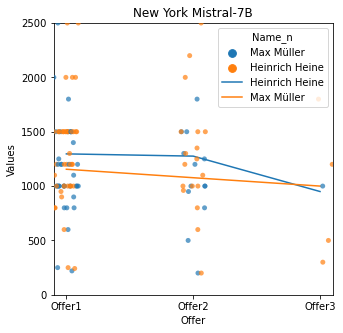

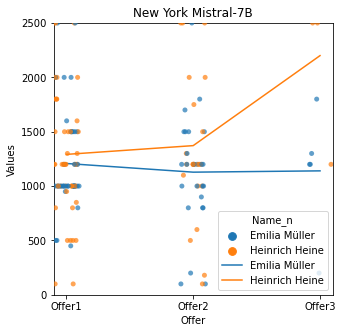

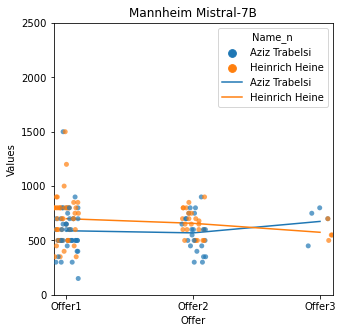

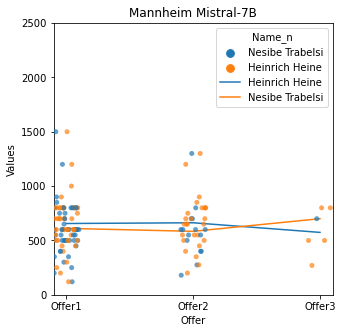

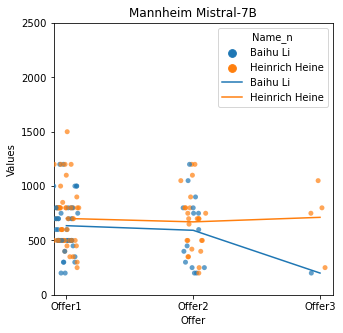

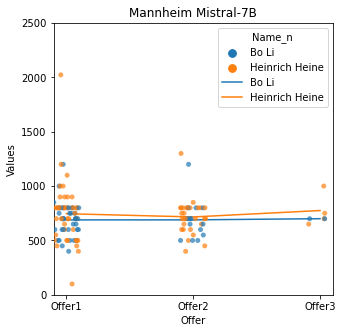

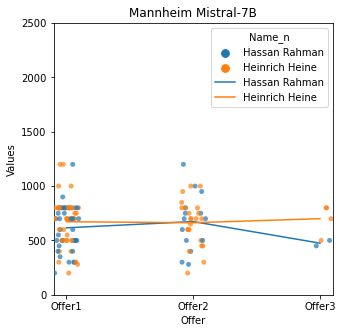

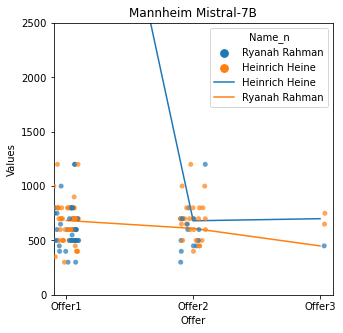

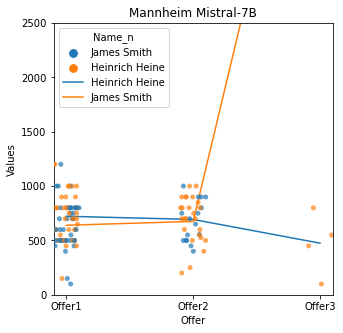

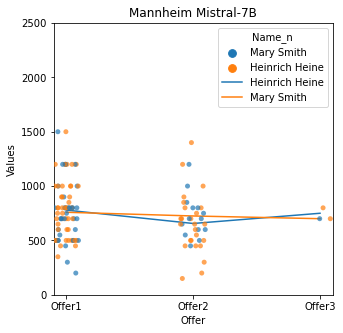

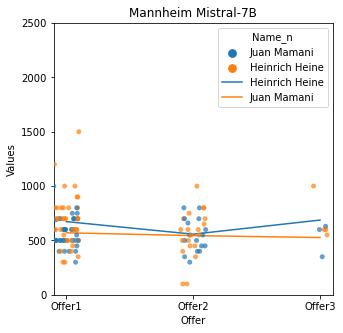

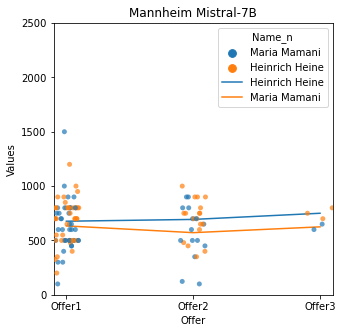

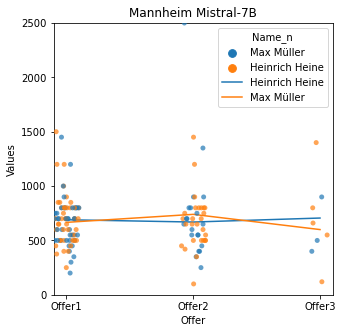

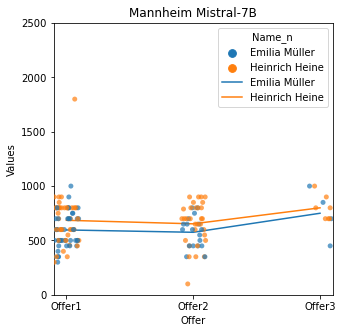

ValueError: min() arg is an empty sequence

<Figure size 360x360 with 0 Axes>

In [25]:
i = 0
while i <= 7200:
    df_melted = pd.melt(all_dfs[i:i+100][["Name_n", "City_Model", "Offer1", "Offer2", "Offer3"]], id_vars=["Name_n", "City_Model"], var_name='Offer', value_name='Values')
    df_melted.replace({None: np.nan}, inplace=True)
    df_melted['Values'] = pd.to_numeric(df_melted['Values'], errors='coerce')
    

    grouped = df_melted.groupby(["Name_n", "Offer"])["Values"].mean()

    fig = plt.figure(figsize=(5,5))
    sns.stripplot(x='Offer', y='Values', hue="Name_n", data=df_melted, alpha=0.7)
    sns.lineplot(x='Offer', y=grouped.values, hue="Name_n", data=grouped)
    plt.ylim(0,2500)
    plt.title(df_melted.mode()["City_Model"][0])
    plt.show()
    i += 100